dict_keys(['tracks'])
49
                         name  popularity  duration_ms
0          Dzień jeden w roku          49       147781
1           Kwiaty we włosach          48       135666
2  Historia jednej znajomości          43       179500
3      Płoną góry, płoną lasy          43       245623
4                 Ciągle pada          43       223720
5     Tak bardzo się starałem          43       144706
6         Niebo z moich stron          41       145746
7            Takie ładne oczy          38       146226
8                 Biały krzyż          39       196160
9                  Anna Maria          38       230973
                      name  popularity  duration_ms
5  Tak bardzo się starałem          43       144706
1        Kwiaty we włosach          48       135666
0       Dzień jeden w roku          49       147781
0    147781
1    135666
2    179500
3    245623
4    223720
5    144706
6    145746
7    146226
8    196160
9    230973
Name: duration_ms, dtype: int64


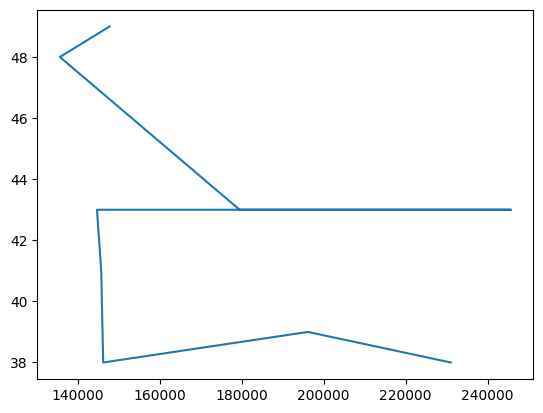

In [21]:
import os # we can access environment variables with this library
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials # method that takes care of the credentials
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET") # Credentials makes this

artists_id = "spotify:artist:4wck1fvaBpmJNFaeDT1Laa" # constant: variable you are not planning to change
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
results = spotify.artist_top_tracks(artists_id) # method is from spotipy, gets 10 results
print(results.keys()) # gives back the top level keys of the .json: in this keys is only tracks
# print(results["tracks"].keys()), gives back a list of tracks (keys cannot be an attribute of a list so if we try -> error)
first_element_tracks = results["tracks"][0]
# print(first_element_tracks.keys()) # keys of a singular track, in this case the one on index 0
print(first_element_tracks["popularity"])

tracks = results["tracks"] # to get the first ten elements of the list (python slice for lists and strings)
df = pd.DataFrame(tracks, columns = ["name", "popularity", "duration_ms"]) # DataFrame works with csv, json, lists etc
print(df)

df_popular = df.sort_values(by=["popularity"])[-3:] # sort DataFrame for popularity
print(df_popular)

duration_points = df.duration_ms
print(duration_points)
popularity_points = df.popularity
plt.plot(duration_points, popularity_points)
plt.show()

In [12]:
import os
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
print(f"Client ID: {client_id}")
print(f"Client Secret: {client_secret}")

Client ID: None
Client Secret: None


   duration_ms              name  popularity
7     2.437100  Takie ładne oczy          38
9     3.849550        Anna Maria          38
8     3.269333       Biały krzyż          39


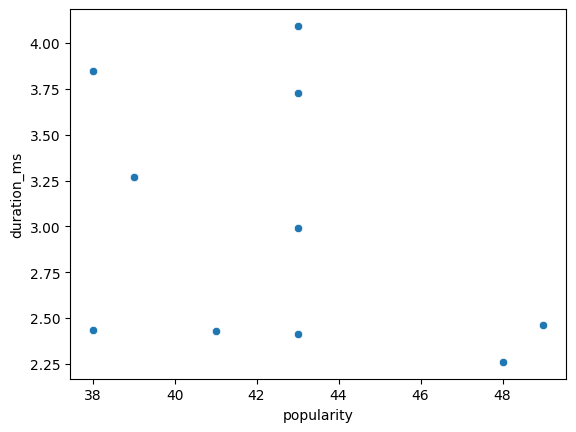

In [22]:
import os
from dotenv import load_dotenv
load_dotenv()

#We are getting the client id and client secrrt
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# Replace these with your actual Spotify API credentials
client_id = client_id
client_secret = client_secret
con = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
artist_id = "4wck1fvaBpmJNFaeDT1Laa"


response = con.artist_top_tracks("4wck1fvaBpmJNFaeDT1Laa")
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

import seaborn as sns

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")